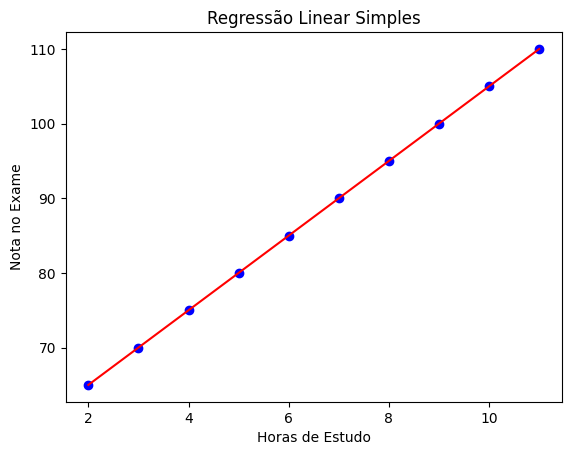

Nota prevista para 8 horas de estudo: 95.00


In [1]:
#REGRESSAO LINEAR SIMPLES
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados de horas de estudo e notas no exame
horas_estudo = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
notas_exame = np.array([65, 70, 75, 80, 85, 90, 95, 100, 105, 110])

# Criar um modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(horas_estudo, notas_exame)

# Coeficientes do modelo
coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_

# Modelo de regressão linear
plt.scatter(horas_estudo, notas_exame, color='blue')
plt.plot(horas_estudo, modelo.predict(horas_estudo), color='red')
plt.title('Regressão Linear Simples')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota no Exame')
plt.show()

# Fazer previsões com o modelo
horas_estudo_novo = np.array([[8]]) # Horas de estudo do novo aluno
nota_prevista = modelo.predict(horas_estudo_novo)
print("Nota prevista para {} horas de estudo: {:.2f}".format(horas_estudo_novo [0] [0], nota_prevista[0]))

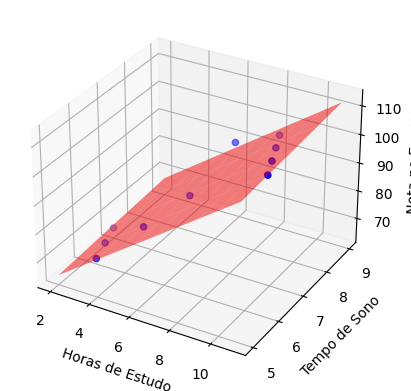

In [2]:
#REGRESSAO LINEAR MULTIPLA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Dados de horas de estudo, tempo de sono e notas no exame
horas_estudo = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
tempo_sono = np.array([7, 6, 5, 6, 7, 8, 9, 8, 7, 6]).reshape(-1, 1)
notas_exame = np.array([65, 70, 75, 80, 85, 98, 95, 100, 105, 110])

# Criar um modelo de regressão linear
modelo = LinearRegression()

# Combinação de horas de estudo e tempo de sono como variáveis independentes
x = np.concatenate((horas_estudo, tempo_sono), axis=1)

# Treinar o modelo
modelo.fit(x, notas_exame)

# Coeficientes do modelo
coef_angular = modelo.coef_
coef_linear = modelo.intercept_

# Plotar os dados em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(horas_estudo, tempo_sono, notas_exame, color='blue')

# Prever notas para o intervalo de horas de estudo e tempo de sono
x_test = np.array([[x, y] for x in range(2, 12) for y in range(5, 10)])
notas_previstas = modelo.predict(x_test)

# Plotar o plano de regressão
x_surf, y_surf = np.meshgrid(range(2, 12), range(5, 10))
exog = np.column_stack((x_surf.flatten(), y_surf.flatten()))
notas_previstas = modelo.predict(exog)
ax.plot_surface(x_surf, y_surf, notas_previstas.reshape(x_surf.shape), color='red', alpha=0.5)

ax.set_xlabel('Horas de Estudo')
ax.set_ylabel('Tempo de Sono')
ax.set_zlabel('Nota no Exame')

plt.show()

Matriz de Confusão: 
 [[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]

Relatório de Classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



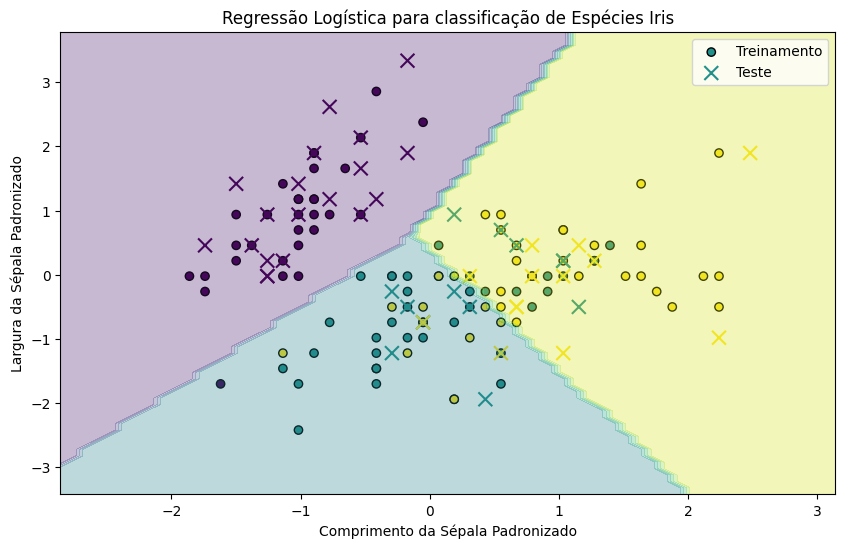

In [5]:
# REGRESSAO LINEAR LOGISTICA
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Passo 1: Carregar o conjunto de dados Iris
iris = load_iris()
x = iris.data[:, :2]  # Apenas as duas primeiras características para visualização
y = iris.target

# Passo 2: Dividir o conjunto de dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Passo 3: Pré-processamento (padronização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Passo 4: Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)  # Usando a variável correta

# Passo 5: Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)  # Usando a variável correta

# Passo 6: Avaliar o desempenho do modelo
print("Matriz de Confusão: \n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação: \n", classification_report(y_test, y_pred))

# Passo 7: Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar os pontos de dados de treinamento
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='Treinamento')

# Plotar os pontos de dados de teste
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Teste')

# Plotar as regiões de decisão
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Largura da Sépala Padronizado')
plt.title('Regressão Logística para classificação de Espécies Iris')
plt.legend()
plt.show()


Erro médio quadrático: 0.9735576723414217


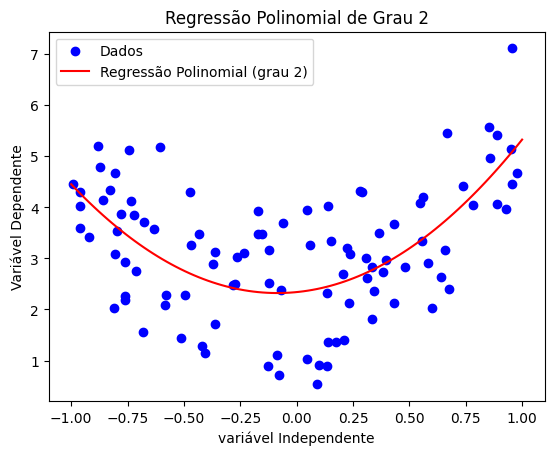

In [6]:
#REGRESSAO POLINOMIAL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Gerar dados sintéticos
np.random.seed(0)
x = 2 * np.random.rand(100, 1) - 1  # Variáveis independentes entre -1 e 1
y = 3*x**2 + 0.5*x + 2 + np.random.randn(100, 1)  # Relação quadrática com ruído

# Plotar os dados
plt.scatter(x, y, color='blue', label='Dados')

# Ajustar uma regressão polinomial de grau 2 aos dados
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

# Plotar a curva ajustada
x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
x_plot_poly = poly_features.transform(x_plot)
y_plot = lin_reg.predict(x_plot_poly)
plt.plot(x_plot, y_plot, color='red', label='Regressão Polinomial (grau 2)')

# Avaliar o modelo
y_pred = lin_reg.predict(x_poly)
mse = mean_squared_error(y, y_pred)
print("Erro médio quadrático:", mse)

plt.xlabel('variável Independente')
plt.ylabel("Variável Dependente")
plt.title('Regressão Polinomial de Grau 2')
plt.legend()
plt.show()

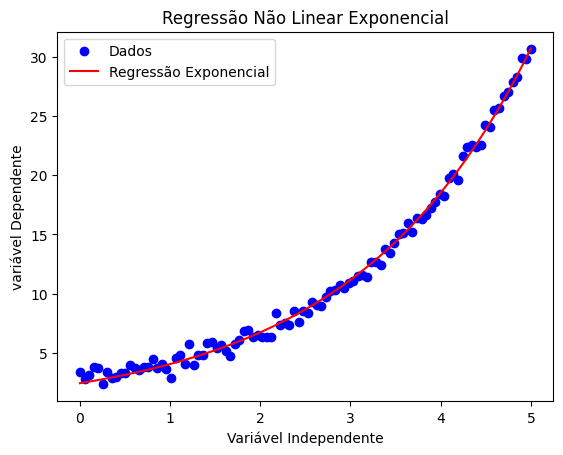

In [7]:
#REGRESSAO NÃO LINEAR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

# Função exponencial para ajustar aos dados
def modelo_exponencial(x, a, b):
    return a * np.exp(b* x)

# Gerar dados sintéticos
np.random.seed(0)
x = np.linspace(0, 5, 100)  # Variável independente
y = 2.5 * np.exp(0.5 * x) + np.random.normal(0, 0.5, 100)  # Relação exponencial com ruído

# Ajustar o modelo aos dados usando curve_fit
params, _ = curve_fit(modelo_exponencial, x, y)

# Plotar os dados
plt.scatter(x, y, color='blue', label='Dados')

# Plotar a curva ajustada
plt.plot(x, modelo_exponencial(x, *params), color='red', label='Regressão Exponencial')
plt.xlabel('Variável Independente')
plt.ylabel('variável Dependente')
plt.title('Regressão Não Linear Exponencial')
plt.legend()
plt.show()